In [1]:
import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

from evaluation.deviations_evalaution_metrics import load_results, DeviationEvaluation

In [2]:
# Load deviation prediction results:
path_pred_deviations = "../2_conformance_prediction/results/Helpdesk/deviation_predictions.pkl"

# Evaluation deviation labels

In [3]:
deviation_results_evaluation = load_results(path=path_pred_deviations)
eval = DeviationEvaluation(deviation_results=deviation_results_evaluation)

In [4]:
# Only evaluate labels that are in the target set!
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_dev()
print("Precision macro dev: ", precision_macro)
print("Precision macro dev per label: ", precision_per_label)
print("Recall macro dev: ", recall_macro)
print("Recall macro dev per label: ", recall_per_label)

Precision macro dev:  0.09621975058525398
Precision macro dev per label:  {('>>', 'Assign seriousness'): 0, ('Require upgrade', '>>'): 0.01764705882352941, ('Resolve ticket', '>>'): 0.07731958762886598, ('Take in charge ticket', '>>'): 0.15083798882681565, ('Wait', '>>'): 0.23529411764705882}
Recall macro dev:  0.6212140701528719
Recall macro dev per label:  {('>>', 'Assign seriousness'): 0.0, ('Require upgrade', '>>'): 1.0, ('Resolve ticket', '>>'): 0.8823529411764706, ('Take in charge ticket', '>>'): 0.9310344827586207, ('Wait', '>>'): 0.2926829268292683}


In [5]:
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_no_dev()
print("Precision macro no dev: ", precision_macro)
print("Precision macro per label no dev: ", precision_per_label)
print("Recall macro no dev: ", recall_macro)
print("Recall macro per label no dev: ", recall_per_label)

Precision macro no dev:  0.998064259769969
Precision macro per label no dev:  {('>>', 'Assign seriousness'): 0.9992138364779874, ('Require upgrade', '>>'): 1.0, ('Resolve ticket', '>>'): 0.9995744680851064, ('Take in charge ticket', '>>'): 0.999154334038055, ('Wait', '>>'): 0.9923786602486964}
Recall macro no dev:  0.9575028411912093
Recall macro per label no dev:  {('>>', 'Assign seriousness'): 1.0, ('Require upgrade', '>>'): 0.9342778433687524, ('Resolve ticket', '>>'): 0.9291930379746836, ('Take in charge ticket', '>>'): 0.9395626242544731, ('Wait', '>>'): 0.9844807003581377}


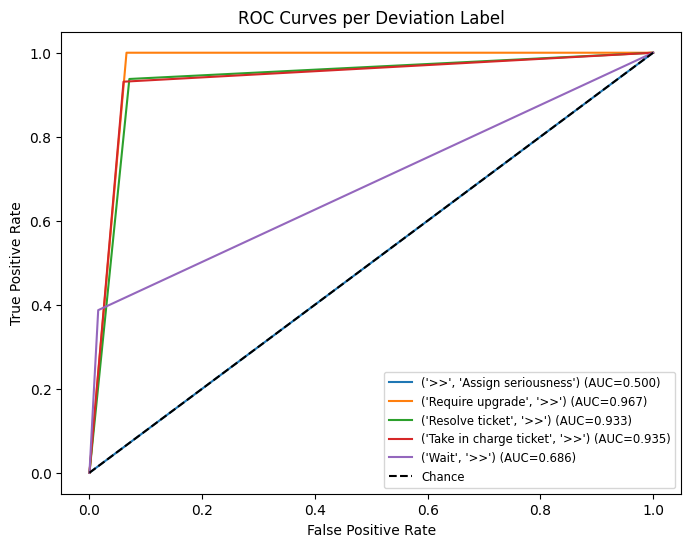

{'per_label_auc': [0.5, 0.9671389216843762, 0.9333465189873418, 0.9352985535065469, 0.6857887372758431], 'macro_auc': 0.8043145462908216}


In [6]:
# roc_auc_macro, roc_auc_per_label = eval.roc_auc_macro_by_label()
# print("ROC_AUC macro dev: ", roc_auc_macro)
# print("ROC_AUC macro dev per label: ", roc_auc_per_label)

roc_auc = eval.plot_macro_roc_auc()
print(roc_auc)

# Evaluation sequences

# Evaluation unseen deviation labels